<a href="https://colab.research.google.com/github/yogeshgujjar/hero-no-1/blob/main/customer_churn_prediction_using_ann_%20part%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [201]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [202]:
drop_cols = ['RowNumber','CustomerId','Surname','Geography','Gender']
df.drop(drop_cols,axis=1,inplace=True)

In [203]:
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [204]:
input_data = df.iloc[:,:-1]
output_data = df.iloc[:,-1]

In [205]:
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [206]:
input_data.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687


In [207]:
input_data.shape

(10000, 8)

In [208]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=10)

In [209]:
x_train.shape

(8000, 8)

In [210]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
937,2.063884,0.484225,-0.004426,0.835324,-0.911583,-1.547768,0.970243,1.234723
9355,0.915392,0.102810,1.032908,-1.225848,-0.911583,0.646092,-1.030670,1.164024
2293,0.398053,0.579578,-1.733315,-0.299734,-0.911583,0.646092,-1.030670,1.699145
192,-1.774770,0.102810,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,0.259204
8675,0.656722,1.437761,0.687130,0.795384,-0.911583,0.646092,-1.030670,0.220617
...,...,...,...,...,...,...,...,...
5624,-0.346915,0.579578,-1.387538,-1.225848,-0.911583,0.646092,-1.030670,0.751341
6005,-0.150326,-1.422847,1.378686,-1.225848,0.807737,-1.547768,0.970243,-1.065242
987,-0.843560,-0.469311,-1.733315,1.207697,-0.911583,0.646092,-1.030670,0.038422
6152,-1.474714,2.391296,-1.041760,-1.225848,-0.911583,0.646092,0.970243,-1.634803


In [211]:
import tensorflow

In [212]:
from keras.layers import Dense
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.models import Sequential

In [213]:
ann = Sequential()

In [214]:
ann.add(Dense(6,input_dim = 8,activation="relu",kernel_regularizer=l2(l2=0.01)))
ann.add(Dense(4,activation="relu"))
ann.add(Dense(2,activation="relu"))
ann.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [215]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [216]:
ann.fit(x_train,y_train, batch_size=100,epochs=50,validation_data=(x_test,y_test),callbacks = EarlyStopping())

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7936 - loss: 0.7413 - val_accuracy: 0.7890 - val_loss: 0.6591
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7976 - loss: 0.6300 - val_accuracy: 0.7890 - val_loss: 0.5638
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7963 - loss: 0.5405 - val_accuracy: 0.7890 - val_loss: 0.5185
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8013 - loss: 0.4984 - val_accuracy: 0.7890 - val_loss: 0.4897
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8007 - loss: 0.4761 - val_accuracy: 0.7890 - val_loss: 0.4694
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7998 - loss: 0.4562 - val_accuracy: 0.7890 - val_loss: 0.4548
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7967 - loss: 0.4457 - val_accuracy: 0.7890 - val_loss: 0.4429
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8065 - loss: 0.4246 - val_accuracy: 0.7890 - val_loss:

In [217]:
train_accuracy = ann.history.history["accuracy"]
test_accuracy = ann.history.history["val_accuracy"]

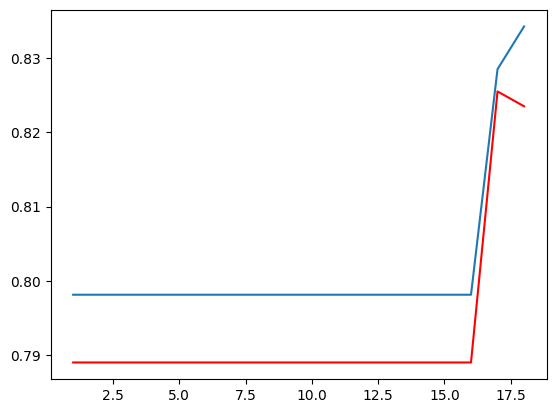

In [218]:
plt.plot([i for i in range(1, len(train_accuracy) + 1)],train_accuracy)
plt.plot([i for i in range(1, len(train_accuracy) + 1)],test_accuracy,c='red')
plt.show()

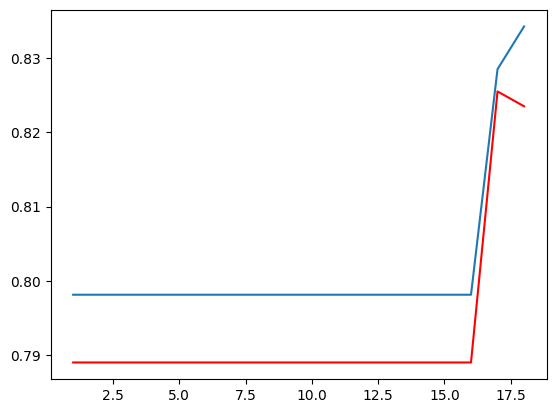

In [220]:
plt.plot([i for i in range(1,19)],train_accuracy)
plt.plot([i for i in range(1,19)],test_accuracy,c='red')
plt.show()

In [221]:
prd1 = ann.predict(x_train)
prd_data1 = []
for i in prd1:
  if i[0] > 0.5 :
    prd_data1.append(1)
  else:
    prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [222]:
prd = ann.predict(x_test)
prd_data = []
for i in prd:
  if i[0] > 0.5 :
    prd_data.append(1)
  else:
    prd_data.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [224]:
#prd_data

In [225]:
from sklearn.metrics import accuracy_score

In [226]:
accuracy_score(y_test,prd_data)*100

82.35

In [227]:
accuracy_score(y_train,prd_data1)*100

83.25

In [228]:
import numpy as np

# Input data ko numpy array me convert karo
x_input = np.array([[-0.564197, -0.660018, -0.695982, 0.324119, 0.807737, -1.547768, -1.030670, -1.013811]])

# Prediction lo
prd = ann.predict(x_input)

# Prediction process
prd_data = []
for i in prd:
    if i[0] > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

print(prd_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[0]


In [229]:
y_test

,Exited
937,0
9355,0
2293,1
192,0
8675,0
...,...
5624,0
6005,0
987,1
6152,0
